In [1]:
# 

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

# Importing the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_train.head()

,Country,Year,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620


In [3]:
print("Train: ", df_train.shape)
print("Test: ", df_test.shape)

Train:  (1627, 9)
Test:  (153, 9)


In [4]:
# Setting up arrays of predictors and target
X_train = df_train.iloc[:, 3:].values
y_train = df_train.iloc[:, 2].values
X_test = df_test.iloc[:, 3:].values
y_test = df_test.iloc[:, 2].values
# Making Ladder as a "Category" ("Happy" > 6)
yc_test = []
for i in y_test:
    if i > 6:
        yc_test.append(1)
    else:
        yc_test.append(0)
        
yc_train = []
for i in y_train:
    if i > 6:
        yc_train.append(1)
    else:
        yc_train.append(0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [63]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, gamma=0.01, C=1, decision_function_shape='ovo')
classifier.fit(X_train[:, [1, 2]], yc_train)
classifier.score(X_test[:, [1, 2]], yc_test)

0.8169934640522876

In [64]:
y_pred = classifier.predict(X_test[:, [1, 2]])

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yc_test, y_pred)

In [71]:
classifier.score(X_train[:, [1, 2]], yc_train)

0.8721573448063922

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


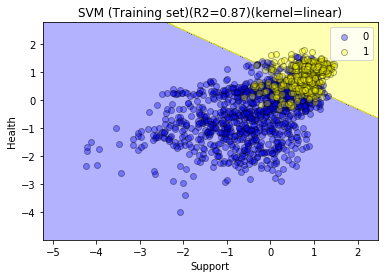

In [73]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train[:, [1, 2]], yc_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j, alpha=0.35, ec='k', lw=1)
plt.title(f'SVM (Training set)(R2=0.87)(kernel={classifier.kernel})')
plt.xlabel('Support')
plt.ylabel('Health')
plt.legend()
plt.savefig("SVM_Support_Health.png", dpi=450)
plt.show()


In [85]:
# 

from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'decision_function_shape': ['ovo', 'ovr']}
model = SVC(kernel='linear')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train[:, [1, 2]], yc_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 4, 7, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.001, 0.01, 0.1, 0.167, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [86]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
grid.best_params_

{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.001}

In [88]:
grid.best_score_

0.8666125530910808

In [76]:
classifier = SVC(kernel = 'linear', random_state = 0, gamma=0.01, C=1, decision_function_shape='ovo')
classifier.fit(X_train[:, [2, 5]], yc_train)
classifier.score(X_test[:, [2, 5]], yc_test)
print("Train: ", classifier.score(X_train[:, [2, 5]], yc_train))
print("Test: ", classifier.score(X_test[:, [2, 5]], yc_test))

Train:  0.8574062692071297
Test:  0.8104575163398693


In [96]:
params = {
    
    'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'decision_function_shape': ['ovo', 'ovr']}
model = SVC(kernel='rbf', random_state=42)
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train[:,[2,5]], yc_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 4, 7, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.001, 0.01, 0.1, 0.167, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [97]:
grid.best_score_

0.8555601698914582

In [95]:
grid.best_estimator_

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
classifier = grid.best_estimator_
#
#max_depth=6, n_estimators=200
classifier.fit(X_train[:,[2,5]], yc_train)
print("Train: ", regressor.score(X_train[:,[2,5]], yc_train))
print("Test: ", regressor.score(X_test[:,[2,5]], yc_test))

Train:  0.858020897357099
Test:  0.7908496732026143


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


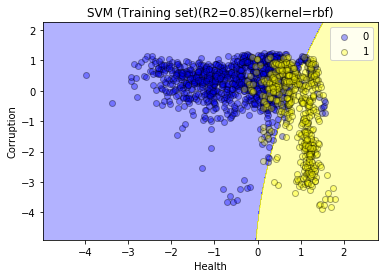

In [99]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train[:,[2,5]], yc_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'yellow'))(i), label = j, alpha=0.35, ec='k', lw=1)
plt.title(f'SVM (Training set)(R2=0.85)(kernel={classifier.kernel})')
plt.xlabel('Health')
plt.ylabel('Corruption')
plt.legend()
plt.savefig("SVM_Health_Corruption.png", dpi=450)
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1]}
    #'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='rbf')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.savefig("grid_search_SVR_C_gamma.png", dpi=450)
    
plot_grid_search(grid.cv_results_, params['C'], params['gamma'], 'C', 'gamma')

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
regressor = SVR(**grid.best_params_)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

In [ ]:
print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    #'C': [0.1, 1, 2, 4, 7, 10],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='rbf', C=1)
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.savefig("grid_search_SVR_C_gamma.png", dpi=450)
    
plot_grid_search(grid.cv_results_, params['epsilon'], params['gamma'], 'epsilon', 'gamma')

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
regressor = SVR(**grid.best_params_)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

In [ ]:
print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

In [ ]:
regressor = SVR(kernel='rbf', C=5, gamma=0.167, epsilon=0.0167)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
params = {
    'C': [0.5, 1, 1.5, 2, 2.5, 4],
    #'degree': [2, 3, 4, 5, 6],
    'gamma': [0.001, 0.01, 0.1, 0.167, 1],
    'epsilon': [0.1, 0.167, 0.2, 0.3, 0.5]}
model = SVR(kernel='linear')
grid = GridSearchCV(model, params, verbose=4, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
regressor = SVR(kernel='rbf', C=1, gamma=0.167, epsilon=0.167)
#
#max_depth=6, n_estimators=200
regressor.fit(X_train, y_train);

print("Train: ", regressor.score(X_train, y_train))
print("Test: ", regressor.score(X_test, y_test))